In [35]:
%cd K-038910

c:\Users\User\Documents\final_project\image data\01.데이터\1.Training\원천데이터\단일경구약제 5000종\TS_81_단일\K-038910


In [36]:
import os

path = "./"
file_list = os.listdir(path)
file_list_png = [file for file in file_list if file.endswith(".png")]

file_list_png

['K-038910_0_0_0_0_70_000_200.png',
 'K-038910_0_0_0_0_70_020_200.png',
 'K-038910_0_0_0_0_70_040_200.png',
 'K-038910_0_0_0_0_70_060_200.png',
 'K-038910_0_0_0_0_70_080_200.png',
 'K-038910_0_0_0_0_70_100_200.png',
 'K-038910_0_0_0_0_70_120_200.png',
 'K-038910_0_0_0_0_70_140_200.png',
 'K-038910_0_0_0_0_70_160_200.png',
 'K-038910_0_0_0_0_70_180_200.png',
 'K-038910_0_0_0_0_70_200_200.png',
 'K-038910_0_0_0_0_70_220_200.png',
 'K-038910_0_0_0_0_70_240_200.png',
 'K-038910_0_0_0_0_70_260_200.png',
 'K-038910_0_0_0_0_70_280_200.png',
 'K-038910_0_0_0_0_70_300_200.png',
 'K-038910_0_0_0_0_70_320_200.png',
 'K-038910_0_0_0_0_70_340_200.png',
 'K-038910_0_0_0_0_75_000_200.png',
 'K-038910_0_0_0_0_75_020_200.png',
 'K-038910_0_0_0_0_75_040_200.png',
 'K-038910_0_0_0_0_75_060_200.png',
 'K-038910_0_0_0_0_75_080_200.png',
 'K-038910_0_0_0_0_75_100_200.png',
 'K-038910_0_0_0_0_75_120_200.png',
 'K-038910_0_0_0_0_75_140_200.png',
 'K-038910_0_0_0_0_75_160_200.png',
 'K-038910_0_0_0_0_75_180_20

In [37]:
file_list_png[0]

'K-038910_0_0_0_0_70_000_200.png'

In [51]:
import cv2
import numpy as np

bounding_rects = []

# 이미지 로드 및 boundingRect 계산
for img in file_list_png:
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_img = cv2.GaussianBlur(gray, (5, 5),0)
    ret, otsu = cv2.threshold(blurred_img,-1,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    contours , hierarchy = cv2.findContours(otsu,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        bounding_rects.append((x, y, x + w, y + h))

# # boundingRect의 평균 계산
# if len(bounding_rects) > 0:
#     mean_min = np.min(bounding_rects, axis=0)
#     print("Average boundingRect:", mean_min)
# else:
#     print("No boundingRects found.")
    

In [9]:
bounding_rects =[]
square_rects = []

for img in file_list_png:
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_img = cv2.GaussianBlur(gray, (5, 5),0)
    ret, otsu = cv2.threshold(blurred_img,-1,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
    contours , hierarchy = cv2.findContours(otsu,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour) # 딱 맞는 사각형 좌표 
        bounding_rects.append((x, y, x + w, y + h)) # 사각형 그릴떄 쓰는 좌표 
        # square_rects.append(((x,y),(x+w,y),(x,y+h),(x+w,y+h))) # 4개 꼭지점 좌표 


# cv2.rectangle(image,(x,y),(x+w,y+h),(0,200,0),2) # 사각형 그림 
cv2.drawContours(image,contours,-1,(0,200,0))
# cv2.imshow('contour',image)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(bounding_rects)
print(square_rects)

[(426, 571, 564, 710), (416, 571, 554, 709), (409, 567, 546, 706), (402, 560, 539, 699), (398, 554, 535, 693), (397, 544, 534, 683), (400, 537, 536, 675), (406, 529, 542, 667), (412, 525, 549, 663), (422, 522, 559, 660), (430, 523, 567, 661), (439, 526, 576, 664), (444, 531, 582, 670), (449, 538, 587, 677), (450, 547, 588, 685), (449, 556, 586, 694), (444, 563, 582, 701), (437, 569, 574, 707), (426, 572, 564, 710), (416, 571, 554, 709), (409, 568, 546, 705), (402, 560, 539, 698), (398, 553, 536, 690), (398, 542, 535, 680), (400, 534, 538, 672), (406, 526, 544, 664), (413, 521, 551, 659), (423, 519, 561, 657), (431, 520, 569, 658), (439, 524, 578, 661), (445, 529, 584, 667), (449, 538, 588, 676), (450, 547, 589, 684), (449, 556, 587, 694), (444, 563, 582, 701), (437, 569, 575, 707), (426, 571, 564, 710), (416, 571, 554, 709), (409, 567, 546, 706), (402, 560, 539, 699), (398, 554, 535, 693), (397, 544, 534, 683), (400, 537, 536, 675), (406, 529, 542, 667), (412, 525, 549, 663), (422, 522

In [14]:
# 블러 이미지 그리기 
cv2.imshow('img',blurred_img) 
cv2.waitKey(5000) 
cv2.destroyAllWindows()

In [69]:
image = cv2.imread(file_list_png[0],0)
blurred_img = cv2.GaussianBlur(image, (5, 5), 0)
# ret, otsu = cv2.threshold(image,-1,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imshow('Original Image', image)
cv2.imshow('Gaussian Blur', blurred_img)
# cv2.imshow('Otsu Threshold', otsu)
cv2.waitKey(0)
cv2.destroyAllWindows()

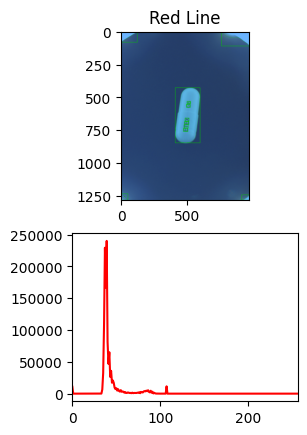

In [39]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

hist1 = cv2.calcHist([image],[0],None,[256],[0,256])

plt.subplot(221),plt.imshow(image,'gray'),plt.title('Red Line')
plt.subplot(223),plt.plot(hist1,color='r')
plt.xlim([0,256])
plt.show()

In [158]:
target_image = file_list_png[215] 
img = cv2.imread(target_image)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred_img = cv2.GaussianBlur(gray, (5, 5),0)
ret, otsu = cv2.threshold(blurred_img,-1,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
contours , hierarchy = cv2.findContours(otsu,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

color = (0,200,0)
# cv2.drawContours(img,contours,-1,(0,200,0))
# cv2.rectangle(img,(371,494),(614,737),color,3) # 최소 x,y , 최대 w,h로 영여 설정 


# cv2.imshow('img',img)
cv2.imshow('contour',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
def test(img): 
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_img = cv2.GaussianBlur(gray, (5, 5),0)
    ret, otsu = cv2.threshold(blurred_img,-1,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
    contours , hierarchy = cv2.findContours(otsu,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour) # 딱 맞는 사각형 좌표 
        bounding_rects.append((x/1280, y/976, (x + w)/1280, (y + h)/976)) # 사각형 그릴떄 쓰는 좌표 
    
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,200,0),2) # 사각형 그림 
    cv2.drawContours(image,contours,-1,(0,200,0))
    cv2.imshow('contour',image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [27]:
test(file_list_png[20]) 

In [38]:
target_image = file_list_png[30] 
image = cv2.imread(target_image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred_img = cv2.GaussianBlur(gray, (5, 5),0)
ret, otsu = cv2.threshold(blurred_img,-1,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
contours , hierarchy = cv2.findContours(otsu,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour) # 딱 맞는 사각형 좌표 
    bounding_rects.append((x/1280, y/976, (x + w)/1280, (y + h)/976)) # 사각형 그릴떄 쓰는 좌표 
    
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,200,0),2) # 사각형 그림 
    cv2.drawContours(image,contours,-1,(0,200,0))
    cv2.imshow('contour',image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

### 윤곽선 일반으로 할때

In [123]:
img = cv2.imread(target_image)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred_img = cv2.GaussianBlur(gray, (3, 3),0)
ret, thresh = cv2.threshold(blurred_img,127,255,0)

contours, hierachy = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(img, contours, -1, (0,255,0), 3)

cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 딱 맞는 윤곽선 박스

In [63]:
bounding_rects =[]
square_rects = []

for img in file_list_png:
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_img = cv2.GaussianBlur(gray, (5, 5),0)
    ret, thresh = cv2.threshold(blurred_img,127,255,0) 
    contours , hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
    largest_contour = max(contour, key=cv2.contourArea)
    
    for contour in contours:
        largest_contour = max(contour, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour) # 딱 맞는 사각형 좌표 
        bounding_rects.append((x/1280, y/976, (x + w)/1280, (y + h)/976)) # 사각형 그릴떄 쓰는 좌표 
        # square_rects.append(((x,y),(x+w,y),(x,y+h),(x+w,y+h))) # 4개 꼭지점 좌표 
    break

cv2.rectangle(image,(x,y),(x+w,y+h),(0,200,0),2) # 사각형 그림 
cv2.drawContours(image,contours,-1,(0,200,0))
cv2.imshow('contour',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (901215370.py, line 10)

In [48]:
len(bounding_rects)

1

In [19]:
target_image = file_list_png[215]

In [50]:
for img in file_list_png:
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_img = cv2.GaussianBlur(gray, (5, 5),0)
    ret, thresh = cv2.threshold(blurred_img,127,255,0)
    contours , hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        bounding_rects.append((x, y, x + w, y + h))

# boundingRect의 평균 계산
if len(bounding_rects) > 0:
    max = np.max(bounding_rects, axis=0)
    print("Average boundingRect:", max)
else:
    print("No boundingRects found.")
    


Average boundingRect: [ 975. 1279.  976. 1280.]
